In [61]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Dropout
from keras.models import Model

In [62]:
(X_train, _), (X_test, _) = mnist.load_data()

In [63]:
# Normalize and preprocess the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [65]:
# Flatten the images (28x28 -> 784)
X_train = X_train.reshape(len(X_train), -1)  # -1 infers the second dimension
X_test = X_test.reshape(len(X_test), -1)

In [66]:
print(X_train.shape)  # (60000, 784)
print(X_test.shape)   # (10000, 784)

(60000, 784)
(10000, 784)


In [67]:
# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dropout(0.3)(encoded)  # Increased dropout rate
encoded = Dense(units=32, activation='relu')(encoded)  # Reduced encoding dimension
decoded = Dense(units=784, activation='sigmoid')(encoded)

In [68]:
# Build the autoencoder and encoder models
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [69]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [70]:
# Train the autoencoder
autoencoder.fit(X_train, X_train,
                epochs=50,  # Increased epochs to improve learning
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0085 - loss: 0.3697 - val_accuracy: 0.0098 - val_loss: 0.1794
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.0088 - loss: 0.1814 - val_accuracy: 0.0073 - val_loss: 0.1506
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0091 - loss: 0.1603 - val_accuracy: 0.0100 - val_loss: 0.1358
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0106 - loss: 0.1495 - val_accuracy: 0.0125 - val_loss: 0.1258
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0109 - loss: 0.1414 - val_accuracy: 0.0115 - val_loss: 0.1186
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0117 - loss: 0.1367 - val_accuracy: 0.0108 - val_loss: 0.1142
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0112 - loss: 0.1330 - val_accuracy: 0.0147 - val_loss: 0.1112
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0115 - loss: 0.1309 - val_accu

In [71]:
# Get encoded representations and reconstructed images
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

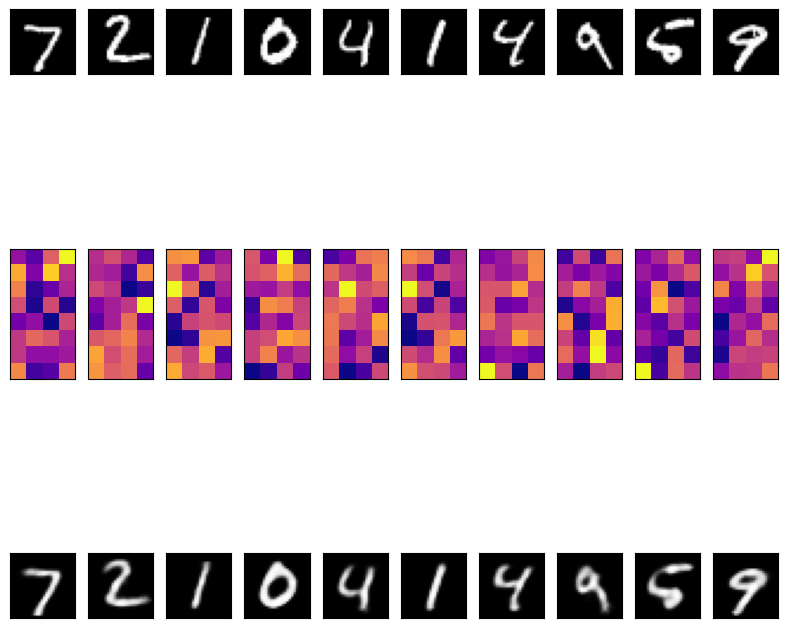

In [74]:
# Plot the original, encoded, and reconstructed images
plt.figure(figsize=(20, 10), dpi=100)
for i in range(10):
    # Display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded images as 1D vectors (better for visualization)
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8, 4), cmap='plasma')  # Reshaping the 32 encoded features into 8x4 grid
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(3, 20, 2 * 20 + i + 1)
    plt.imshow(predicted[i].reshape(28, 28), cmap='gray')  # Use gray for better clarity
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()